# Trabalho de Implementação 1

**<font color='red'>Discipline: CMP197 - Introdução à Visão Computacional</font>**

Professor:

- Cláudio Jung

Authors:
- Lucas Nedel Kirsten, 230262
- Diego Severo Jardim, 319862

## Importing the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cvwt # import our module for Wavelet Transform
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

**Available functions on the cvwt module**

In [3]:
cvwt.__all__

['wavelet_1d',
 'inv_wavelet_1d',
 'wavelet_2d',
 'inv_wavelet_2d',
 'compact_image',
 'apply_soft_thresholding',
 'plot_dwt2',
 'psnr',
 'dwt',
 'dwt2',
 'idwt',
 'idwt2']

**Use the following sintax for function documentation**

In [4]:
cvwt.dwt?

## Question 1

**Define iterations, input signal and the filter type**

In [5]:
# input signal
x = np.array([1, 2, -1, 3, 6, -2, -1, 3])

# number of iterations
J = 3

# wavelet family
# you can try with other available families in the PyWavelet lib like sym19
wavelet = 'haar'

**Going forward in the wavelet transform**

In [6]:
print('Wavelet:')
cA, cD = cvwt.dwt(x=x, J=J, wavelet=wavelet)

# iterate over the coefficients to print them
print(f'A{J}: ', cA)
for j, dj in enumerate(cD):
    print(f'D{j+1}: ', dj)

Wavelet:
A3:  [3.8890873]
D1:  [-0.70710678 -2.82842712  5.65685425 -2.82842712]
D2:  [0.5 1. ]
D3:  [-0.35355339]


**Returning to the original signal**

In [7]:
print('\nInverse Wavelet:')
inv = cvwt.idwt(cA, cD, wavelet=wavelet)
print(f'Inverse(A{J-j}): ', inv)

mse_res = np.mean(np.square(inv-x))
print(f'\nMSE: {mse_res:.2f}') # inverse error


Inverse Wavelet:
Inverse(A1):  [ 1.  2. -1.  3.  6. -2. -1.  3.]

MSE: 0.00


### Results' Comments

A first notice of our implementations regards the padding used during convolution. While PyWavelet uses as default the *symetric* padding mode (and allows other modes too), we only implemented the *zero* equivalent mode (for reference: [PyWavelet padding modes](https://pywavelets.readthedocs.io/en/latest/ref/signal-extension-modes.html#ref-modes)). It is also possible to use other wavelets families as referenced [here](https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#wavelet-families).

Regarding our results, it is noticeable that we are achieving what was expected by the usage of the inverse transform over the approximation and the detail coefficients in the input signal.

## Question 2

**Define the input image, number of iterations and the filter type**

In [8]:
# open image
x = cv2.imread('cvwt/barbara.jpg')
x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) # you can also use with color channels

# number of iterations
J = 2

# wavelet family
wavelet = 'haar'

**Apply and plot wavelet transform**

/home/diegosevero/Projects/UFRGS/ComputerVisionUFRGS/TP1/cvwt/wavelets.py:135: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  cA_ch, cD_ch = _dwt(xx)


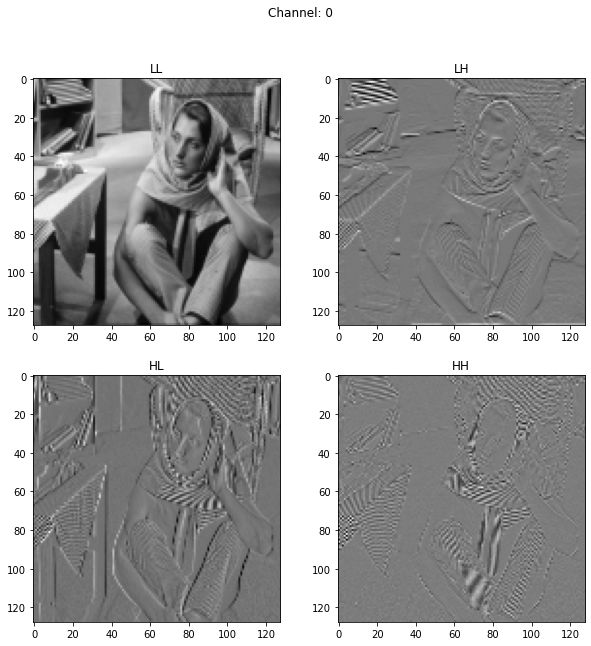

In [9]:
cA, cD = cvwt.dwt2(x, J=J, wavelet=wavelet)
cvwt.plot_dwt2(cA, cD[-1], cmap='gray')

**Visualize inverse transform and calculate the MSE with original image**

MSE [Original vs Reconstructed]: 0.00
SSIM [Original vs Reconstructed]: 1.00


<ipython-input-10-fc175d8f6e5f>:6: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim_res = ssim(x, inv)


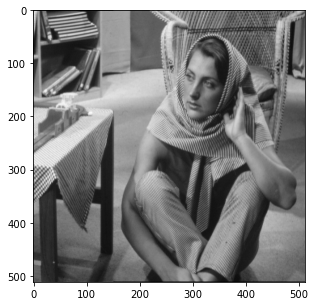

In [10]:
inv = cvwt.idwt2(cA, cD, wavelet=wavelet)
plt.figure(figsize=(5,5))
plt.imshow(inv.astype('uint8'), cmap='gray')

mse_res = np.mean(np.square(inv - x))
ssim_res = ssim(x, inv)

print(f'MSE [Original vs Reconstructed]: {mse_res:.2f}') # inverse error
print(f'SSIM [Original vs Reconstructed]: {ssim_res:.2f}')

### Results' Comments

Relating to the mean squared error (MSE) and the Structural Similarity Index (SSIM) it is noticeable that we are achieving the expected results regarding the Wavelet 2D. Again, the padding mode used is the *zero* equivalent padding from PyWavelet, and it is possible to use other wavelet families. Our Wavelet 2D implementation also allows us to use color channel images as input (3D tensors) with a N number of channels.

## Question 3

**Define the input image, number of iterations, filter type and noise and soft-threshold parameters**

In [11]:
# open image
x = cv2.imread('cvwt/barbara.jpg')
x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

# define iterations
Js = [2, 3, 4]

# wavelet family
wavelet = 'haar'

# noise parameters
mean = 0
var = 200

# soft-threshold parameters 
ts = [10, 80, 150, 200]
alphas = [0.1, 0.3, 0.5, 0.8]

**Add noise to the image and make a comparison between both original and noisy images**

MSE [Original vs Noise]: 75.76
SSIM [Original vs Noise]: 0.58


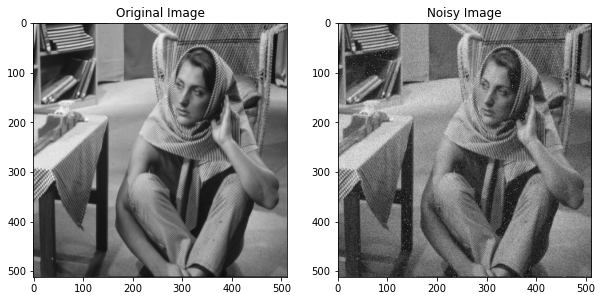

In [12]:
# add noise to the image
sigma = np.sqrt(var)
noise = x.astype('float32') + np.random.normal(mean,sigma, x.shape)
noise = np.uint8(noise)

mse_res = np.mean(np.square(noise - x))
ssim_res = ssim(x, noise)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(x, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(noise, cmap='gray')
axs[1].set_title('Noisy Image')

print(f'MSE [Original vs Noise]: {mse_res:.2f}')
print(f'SSIM [Original vs Noise]: {ssim_res:.2f}')

**Apply the soft-thresholding on the wavelet coefficients and plot the results**

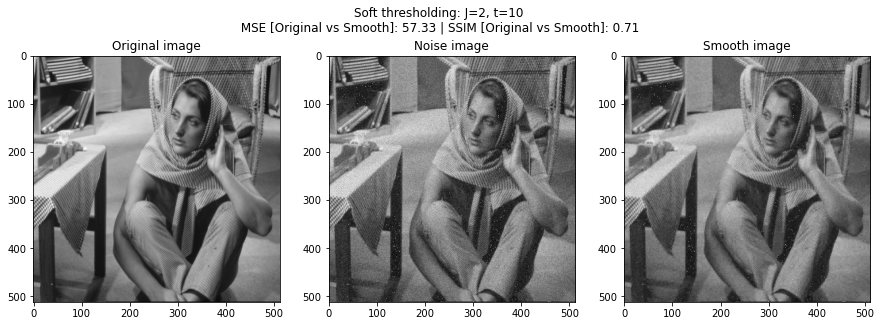

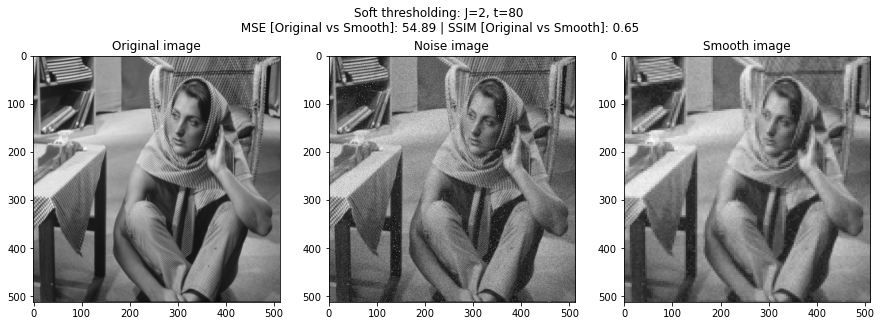

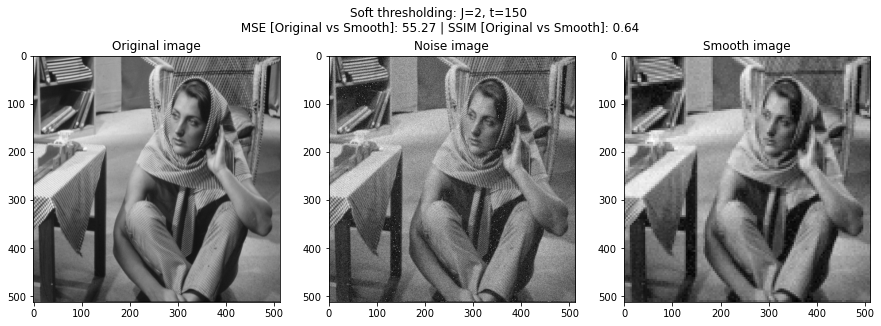

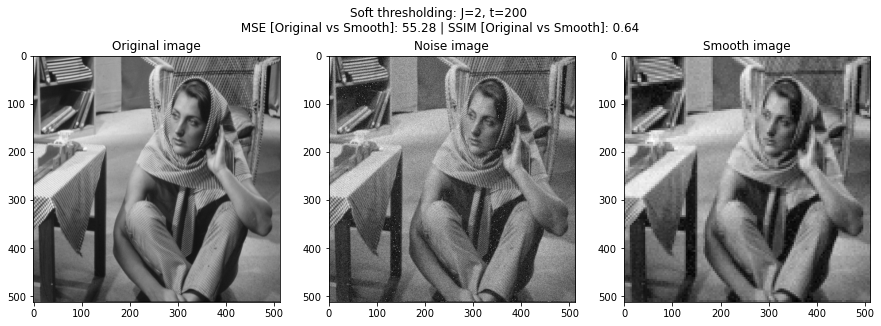

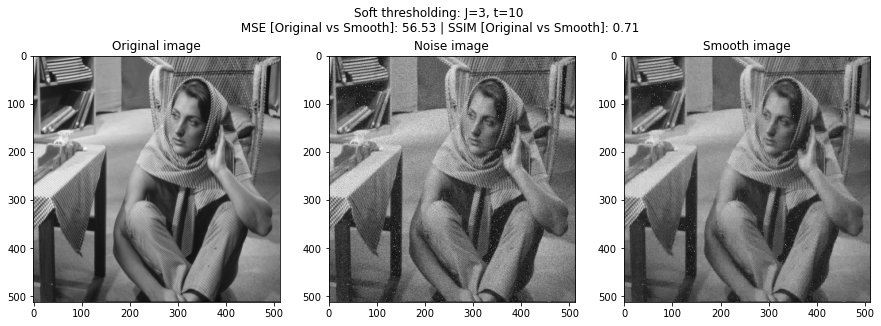

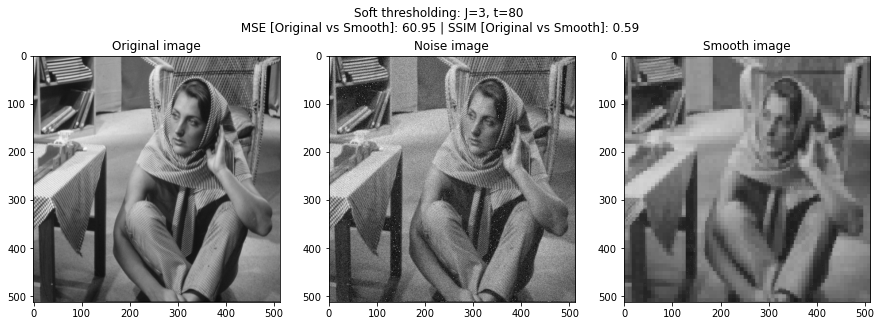

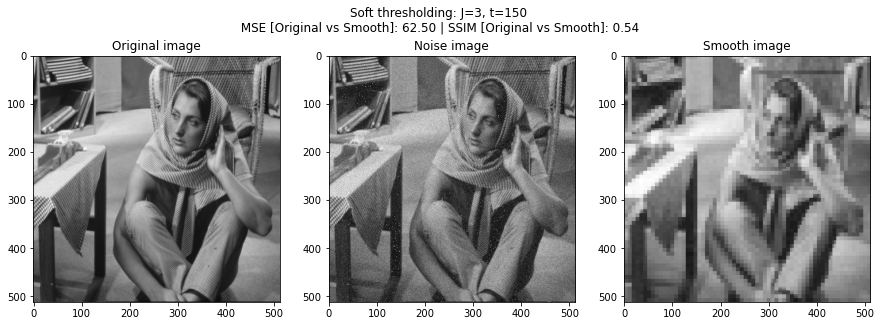

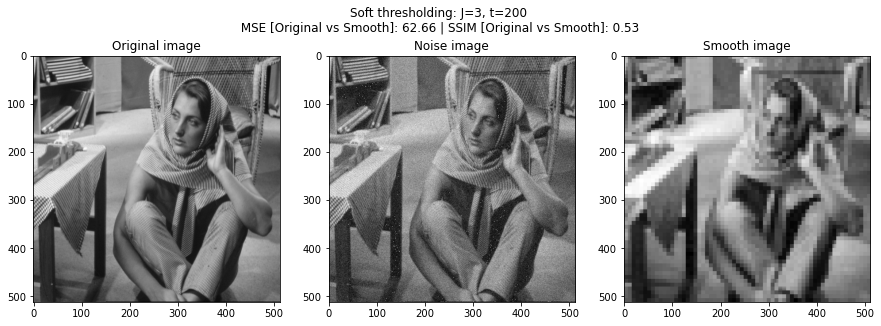

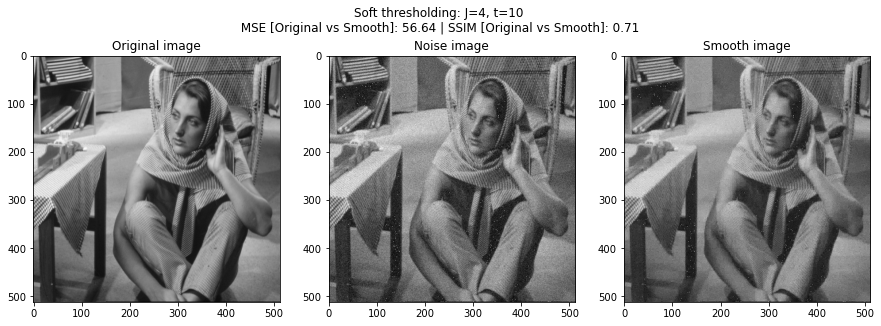

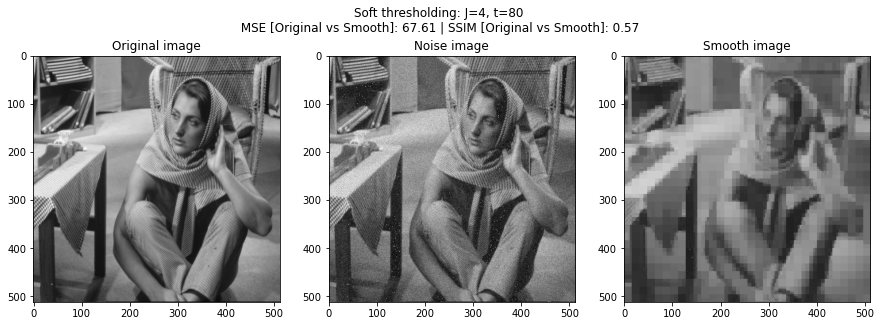

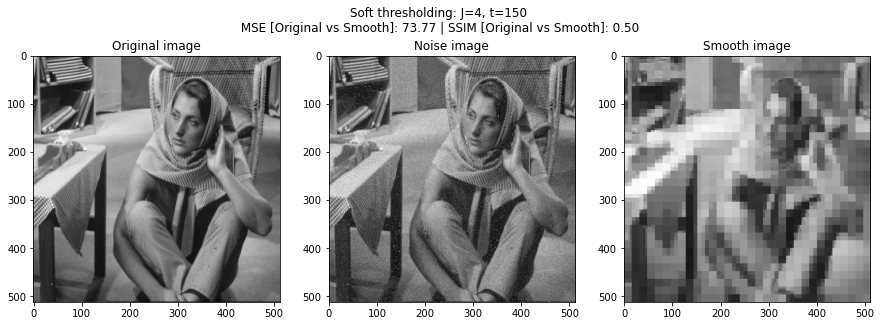

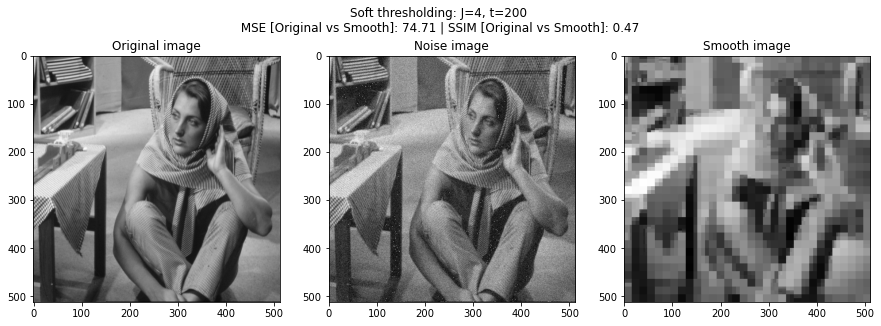

In [13]:
# plot results for chose t
for J in Js:
    for t in ts:
        smooth = cvwt.apply_soft_thresholding(noise, J=J, t=t, wavelet=wavelet)
        
        mse_res = np.mean(np.square(smooth - x))
        ssim_res = ssim(x, smooth)

        fig, axs = plt.subplots(1,3, figsize=(15,5))
        fig.suptitle(f'Soft thresholding: J={J}, t={t}\n MSE [Original vs Smooth]: {mse_res:.2f} | SSIM [Original vs Smooth]: {ssim_res:.2f}')
        axs[0].imshow(x, cmap='gray')
        axs[0].set_title('Original image')
        
        axs[1].imshow(noise, cmap='gray')
        axs[1].set_title('Noise image')
        
        axs[2].imshow(smooth, cmap='gray')
        axs[2].set_title('Smooth image')

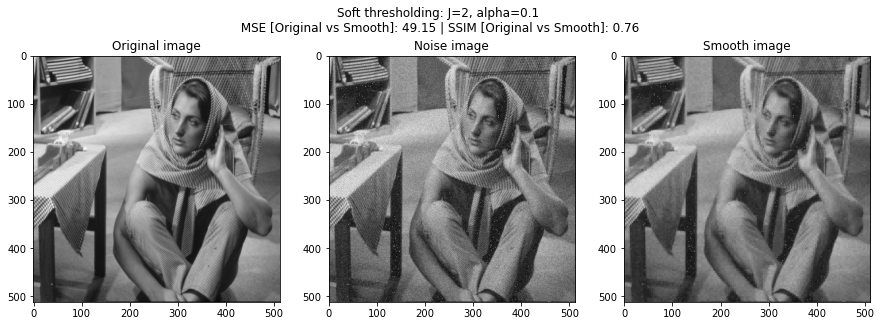

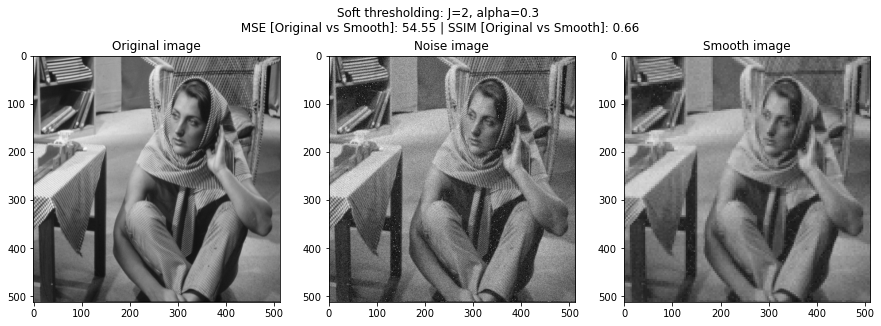

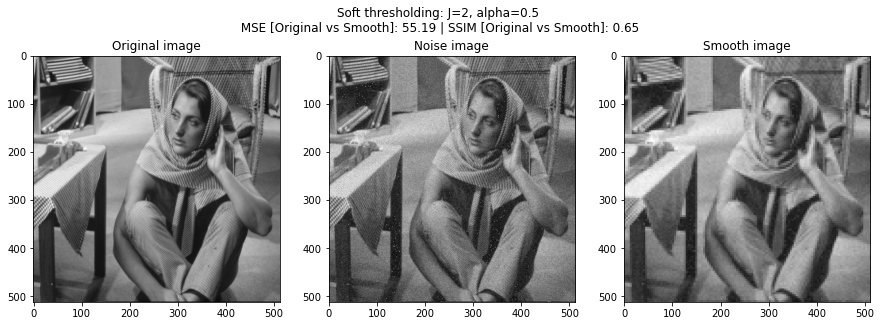

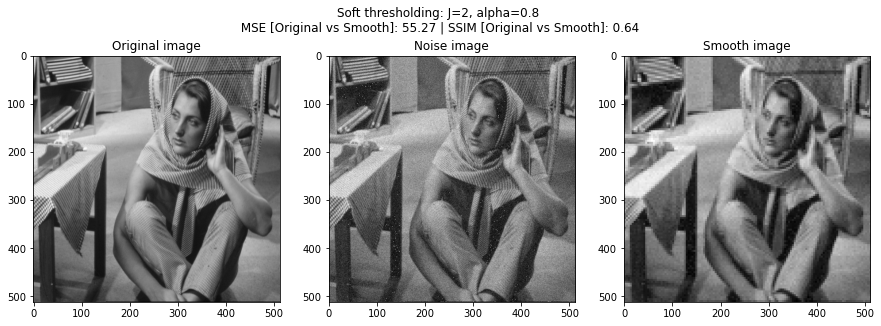

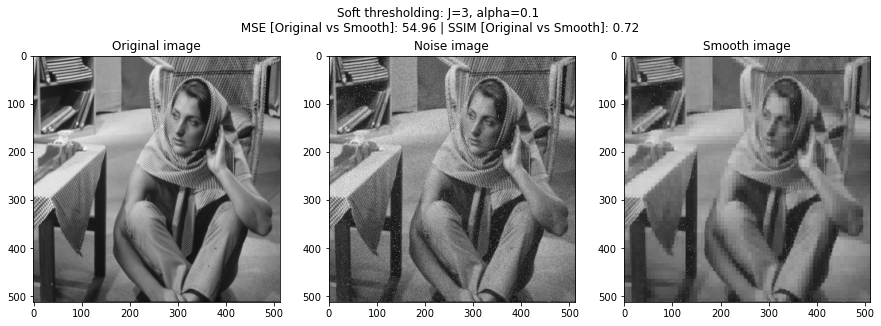

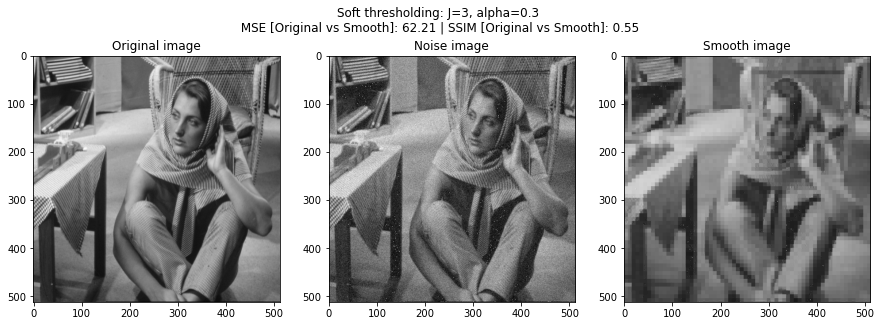

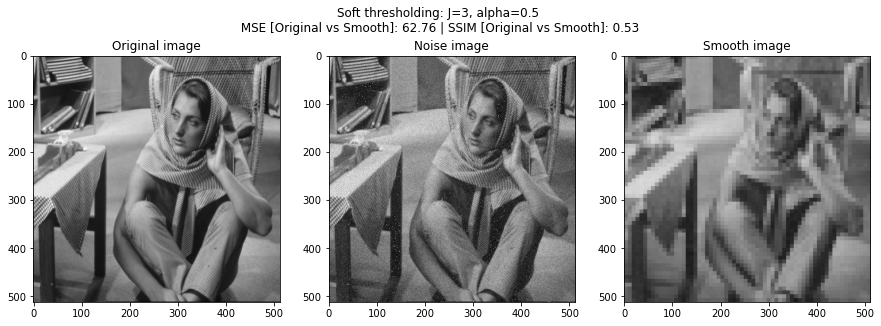

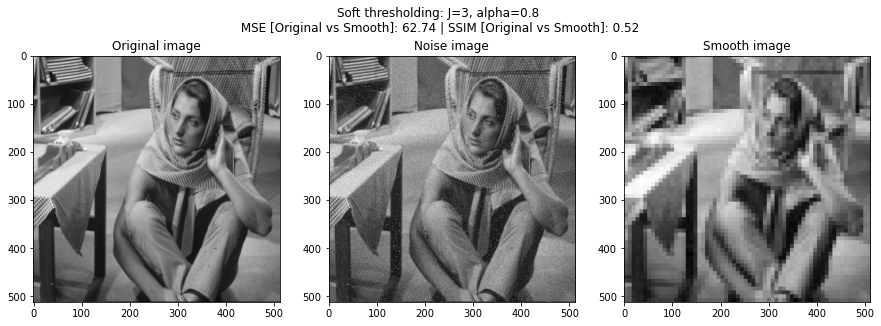

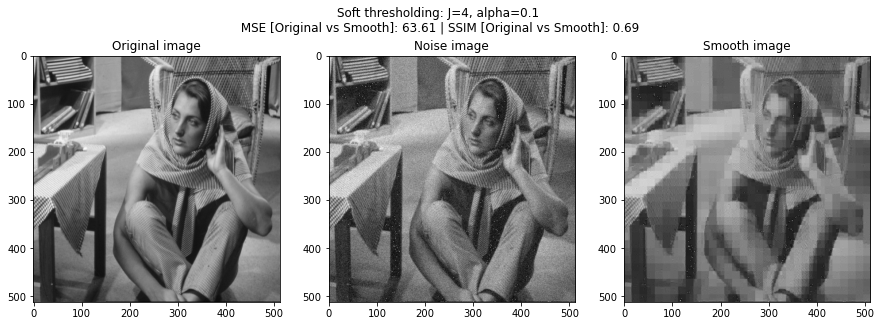

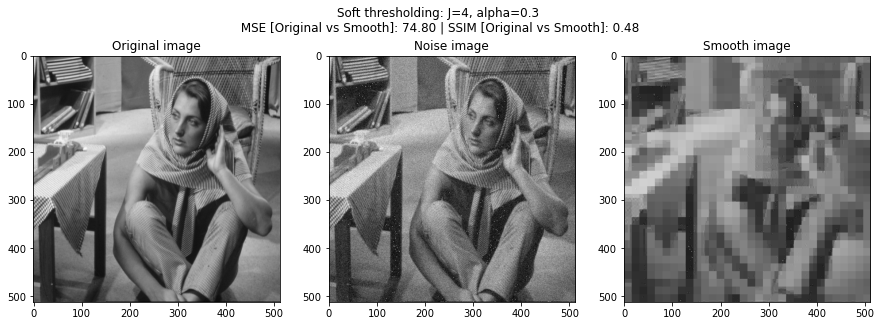

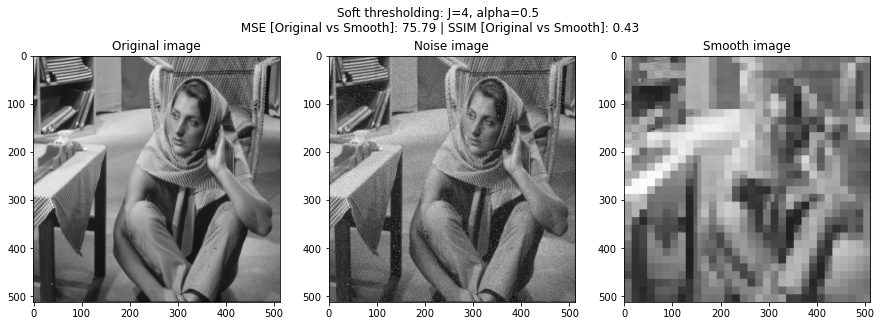

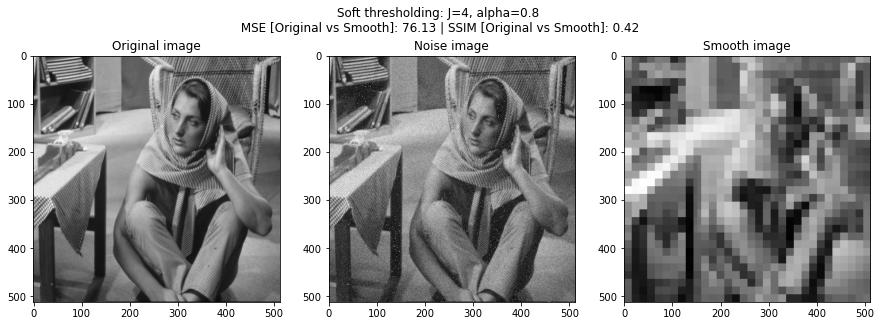

In [14]:
# plot results for chose alphas
for J in Js:
    for alpha in alphas:
        smooth = cvwt.apply_soft_thresholding(noise, J=J, alpha=alpha, wavelet=wavelet)
        
        mse_res = np.mean(np.square(smooth - x))
        ssim_res = ssim(x, smooth)
        
        fig, axs = plt.subplots(1,3, figsize=(15,5))
        fig.suptitle(f'Soft thresholding: J={J}, alpha={alpha}\n MSE [Original vs Smooth]: {mse_res:.2f} | SSIM [Original vs Smooth]: {ssim_res:.2f}')
        axs[0].imshow(x, cmap='gray')
        axs[0].set_title('Original image')
        
        axs[1].imshow(noise, cmap='gray')
        axs[1].set_title('Noise image')
        
        axs[2].imshow(smooth, cmap='gray')
        axs[2].set_title('Smooth image')

### Results' Comments

We chose to implement the soft thresholding function with two possibilities: inputting the *t* value directly, or inputting an *alpha* value which will be used to determine the *t* value of each level of the Wavelet transform as follows: **t = alpha x max(abs(cD))**, where cD is the detail coefficient.

Regarding the usage of the *t* value directly, it seems to be difficult to get the right setup of the number of iterations J and the *t* value so the algorithm returns good denoised images - since it is not noticeable some linear relation between them. This can be explained by the diference on the values for each level of the detail coefficients and, because we are using a fixed value for the soft thresholding, it may imply in different effects on each detail coefficient level (D1, D2, ..., DJ). Using low iterations seems to return more stable results; while increasing the number of iterations, the returned image seems to be more unstable, since even intermediate values of *t* (such as 80, as seen in the provided images) are capable of adding checkered effect. On the other hand, a higher J value with a better choice of *t* seems to return the best results (such as *t*=10 and J=4) as we can see in the plots above containing the results of the comparison between both original and smooth images.

In order to suppress the effect of using a direct value for the soft thresholding, the *alpha* value is capable of determining a better suited value of *t* by using the information of the maximum gradient value on each of the detail coefficients for each level of the wavelet transform. For this reason, this technique appears to return a more suited relation between J and *alpha*. Now, both higher values of J and *alpha* are capable of smoothing the input signal and it seems to be easier to choose the values that better denoise the image. An easy form to determine the best parameters for denoising the input image would be by linear increasing *alpha* and then *J* until the expected smooth signal is achieved.

## Question 4

**Define the input image, number of iterations and the parameters for compaction**

In [15]:
# open image
x = cv2.imread('cvwt/barbara.jpg')
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

# define iterations
Js = [4]

# define alpha values
alphas = [0.25, 0.5, 0.75, 0.9]

**Compact the image and compare the reconstructed image to the original one**

/home/diegosevero/Projects/UFRGS/ComputerVisionUFRGS/TP1/cvwt/wavelets.py:135: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  cA_ch, cD_ch = _dwt(xx)


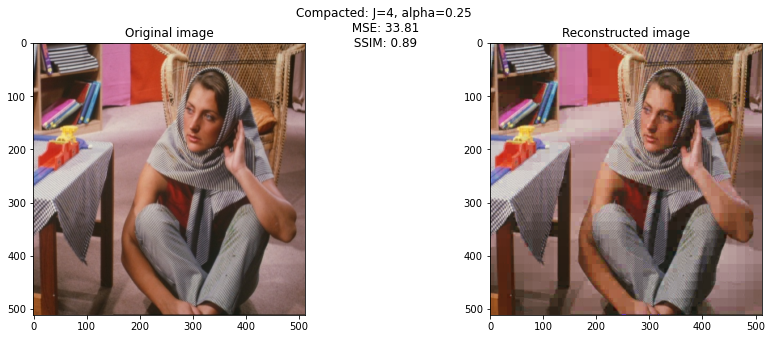

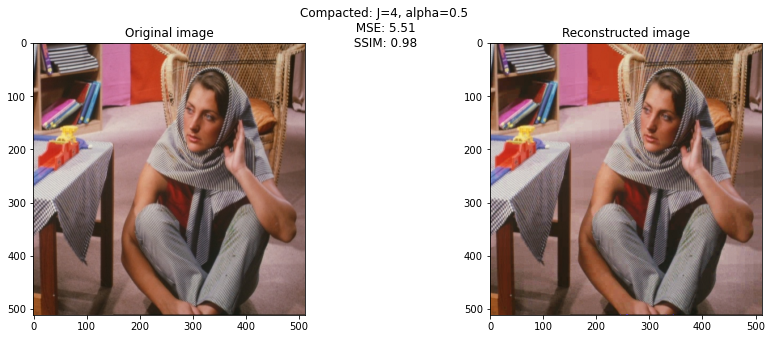

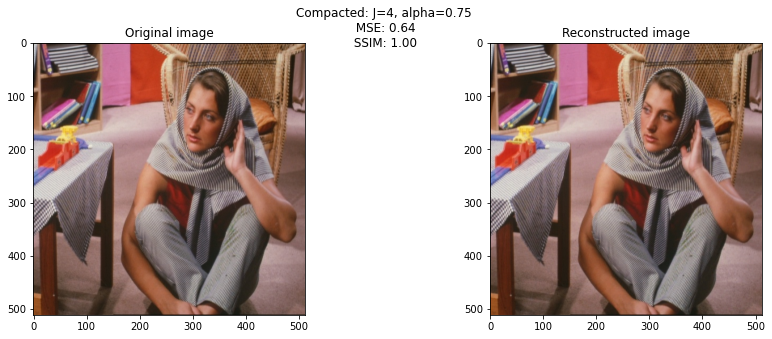

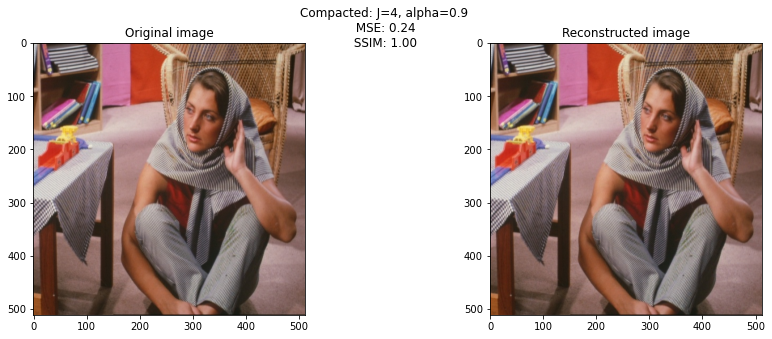

In [16]:
# plot results for chose alphas
for J in Js:
    for alpha in alphas:
        (cA, Dj, reconstructed) = cvwt.compact_image(x, J=J, alpha=alpha)
        
        mse_res = np.mean(np.square(reconstructed - x))
        ssim_res = ssim(x, reconstructed, multichannel=True)
        
        fig, axs = plt.subplots(1,2, figsize=(15,5))
        fig.suptitle(f'Compacted: J={J}, alpha={alpha}\n MSE: {mse_res:.2f}\n SSIM: {ssim_res:.2f}')
        axs[0].imshow(x)
        axs[0].set_title('Original image')

        axs[1].imshow(reconstructed)
        axs[1].set_title('Reconstructed image')

**Experiment compressing the image**

In [17]:
import os
import pickle
import zipfile

for J in Js:
    for alpha in alphas:
        # compress and convert the image to bytes and save it
        (cA, Dj, reconstructed) = cvwt.compact_image(x, J=J, alpha=alpha)

        bytes_data = pickle.dumps((cA, Dj))
        open('coefficients.pkl', 'wb').write(bytes_data)

        # compress to gzip to leverage matrix sparcity
        with zipfile.ZipFile('coefficients_zipped.zip', 'w', compression=zipfile.ZIP_DEFLATED) as f:
            f.write('coefficients.pkl')

        # print the size of the saved files
        print(f'J = {J}, alpha = {alpha}')
        print('Size of original JPG image: {:.2f} KB'.format(float(os.path.getsize('cvwt/barbara.jpg'))/1024.))
        print('Size of wavelet coefficients: {:.2f} KB'.format(float(os.path.getsize('coefficients.pkl'))/1024.))
        print('Size of compressed wavelet coefficients: {:.2f} KB\n'.format(float(os.path.getsize('coefficients_zipped.zip'))/1024.))

J = 4, alpha = 0.25
Size of original JPG image: 99.85 KB
Size of wavelet coefficients: 6144.36 KB
Size of compressed wavelet coefficients: 541.88 KB

J = 4, alpha = 0.5
Size of original JPG image: 99.85 KB
Size of wavelet coefficients: 6144.36 KB
Size of compressed wavelet coefficients: 942.57 KB

J = 4, alpha = 0.75
Size of original JPG image: 99.85 KB
Size of wavelet coefficients: 6144.36 KB
Size of compressed wavelet coefficients: 1273.93 KB

J = 4, alpha = 0.9
Size of original JPG image: 99.85 KB
Size of wavelet coefficients: 6144.36 KB
Size of compressed wavelet coefficients: 1424.76 KB



### Results' Comments

In our implementation we decided to use the *alpha* value as the number of effective detail coefficient values (values different from zero). This means that values that already were zero in the detail coefficient are used to determine the number of the final effective values. So, the expression used to evaluate the number of effective values on the detail coefficients were: ***alpha* = (# of non-zero values)/(# of zero values)**. We also used the GZIP compression to evaluate the effects of the compactness, since this type of comprehension is beneficial for sparse matrices storage.

As expected by the above definition, lower *alpha* values result in a more compact file size in memory with the expense of a lower quality image (is noticeable for J=4 and *alpha*=0.5 the appearance of a checker effect). Even though it is possible to achieve good compressions with this technique (11 times for J=4 and *alpha*=0.25 and 4 times for J=4 and *alpha*=0.9), it was not capable of matching the JPG compression format. This can be due the fact that we are storing the detail coefficient as float32 data type, while an integer format would be more appropriate.